In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

#길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))        #[1033.33333333]. 즉 1033g 정도로 예측. 근처 3샘플의 평균값의미.

#K최근접이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다. 따라서 새로운 샘플이 훈련 세트의 범위를
#벗어나면 엉뚱한 값을 예측한다.

[1033.33333333]


[1241.83860323]
[39.01714496] -709.0186449535477


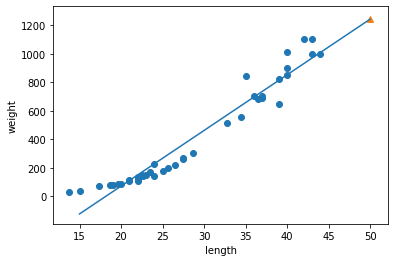

0.9398463339976039
0.8247503123313558


In [14]:
#선형 회귀 방식
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#길이가 50cm인 농어 예측
print(lr.predict([[50]]))                  #[1241.83860323]
 
#이 때 기울기와 절편값 a,b는 lr객체의 coef_ , intercept_ 에 저장되어있다.
print(lr.coef_, lr.intercept_)             #[39.01714496] -709.0186449535477

#그려보기
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)

#15 ~ 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어의 데이터
plt.scatter(50, 1241.8, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#훈련세트와 테스트 세트에 대한 R2점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

'''
0.9398463339976039
0.8247503123313558

차이가 많이 난다. => 직선보다는 곡선이 최적. 즉, 무게 = a * 길이^2 + b * 길이 + c와 같은 2차 방정식 형태
'''


In [17]:
#다항회귀 => 엄밀히 말하면 이것도 선형이다. 
#다항회귀 같은 2차 방정식 그래프를 사용하려면 길이(데이터)에 제곱한 항이 훈련 세트에 추가돼야한다. 

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))   #1573.98423528]
print(lr.coef_, lr.intercept_)     #[  1.01433211 -21.55792498] 116.05021078278304

#즉, 무게 = 1.01 * 길이제곱 - 21.6 * 길이 + 116  => 다항식을 사용한 선형회귀로 다항회귀

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278304
